In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

In [9]:
# Loading the data, converting it to csv and quickly inspecting it
raw_data = pd.read_parquet('data/yellow_tripdata_2024-12.parquet')
#raw_data.to_csv('data/raw_data.csv', index=False)
raw_data.to_csv()
raw_data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,N,158,42,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00


In [10]:
print(raw_data.columns)
raw_data.describe()

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,3.668371e+06,3668371,3668371,3.342080e+06,3.668371e+06,3.342080e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.668371e+06,3.342080e+06,3.342080e+06
mean,1.774713e+00,2024-12-15 07:08:54.224627,2024-12-15 07:27:35.844428,1.362442e+00,5.087801e+00,2.328345e+00,1.648840e+02,1.637911e+02,1.133466e+00,1.966129e+01,1.355909e+00,4.746317e-01,3.459468e+00,5.569900e-01,9.515708e-01,2.832041e+01,2.221417e+00,1.281910e-01
min,1.000000e+00,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-9.750000e+02,-9.250000e+00,-5.000000e-01,-8.000000e+01,-7.038000e+01,-1.000000e+00,-9.510000e+02,-2.500000e+00,-1.750000e+00
25%,2.000000e+00,2024-12-08 00:30:19,2024-12-08 00:46:27.500000,1.000000e+00,9.700000e-01,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,9.300000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.596000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2024-12-14 16:33:04,2024-12-14 16:54:20,1.000000e+00,1.680000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.420000e+01,1.000000e+00,5.000000e-01,2.720000e+00,0.000000e+00,1.000000e+00,2.166000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2024-12-21 13:15:27,2024-12-21 13:31:43,1.000000e+00,3.250000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.392000e+01,2.500000e+00,5.000000e-01,4.480000e+00,0.000000e+00,1.000000e+00,3.210000e+01,2.500000e+00,0.000000e+00
max,7.000000e+00,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,3.288276e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.033100e+03,1.425000e+01,1.050000e+01,4.710000e+02,1.201500e+02,1.000000e+00,3.037100e+03,2.500000e+00,1.750000e+00
std,4.226947e-01,NaN,NaN,8.233151e-01,4.728321e+02,1.093203e+01,6.434142e+01,6.958441e+01,6.746053e-01,1.981889e+01,1.799476e+00,1.453362e-01,4.180591e+00,2.247470e+00,2.893107e-01,2.464529e+01,9.137386e-01,4.758542e-01


In [11]:
# First we will drop a number of columns that are irrelevant for our analysis
irrelevant_columns = ['VendorID', 'store_and_fwd_flag', 'mta_tax', 'improvement_surcharge', 'Airport_fee']
data = raw_data.drop(columns=irrelevant_columns)

In [12]:
# Now we check for NaN values
print(data.isnull().sum())

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          326291
trip_distance                 0
RatecodeID               326291
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
tip_amount                    0
tolls_amount                  0
total_amount                  0
congestion_surcharge     326291
dtype: int64


In [13]:
# There are quite some rows with NaN values, however given the size of the dataset we can afford to drop them
data = data.dropna()
data.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge
count,3342080,3342080,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06,3.342080e+06
mean,2024-12-15 06:14:51.174303,2024-12-15 06:33:29.502092,1.362442e+00,3.302807e+00,2.328345e+00,1.658721e+02,1.647834e+02,1.244127e+00,1.941971e+01,1.481071e+00,3.673157e+00,5.751583e-01,2.839419e+01,2.221417e+00
min,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-9.750000e+02,-9.250000e+00,-8.000000e+01,-7.038000e+01,-9.510000e+02,-2.500000e+00
25%,2024-12-07 22:47:36.750000,2024-12-07 23:06:56,1.000000e+00,9.500000e-01,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.575000e+01,2.500000e+00
50%,2024-12-14 15:19:25,2024-12-14 15:38:27,1.000000e+00,1.630000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.350000e+01,1.000000e+00,2.900000e+00,0.000000e+00,2.136000e+01,2.500000e+00
75%,2024-12-21 13:25:05.250000,2024-12-21 13:41:08,1.000000e+00,3.170000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,2.260000e+01,2.500000e+00,4.650000e+00,0.000000e+00,3.192000e+01,2.500000e+00
max,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,7.176153e+04,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.033100e+03,1.425000e+01,4.710000e+02,1.201500e+02,3.037100e+03,2.500000e+00
std,NaN,NaN,8.233151e-01,3.965839e+01,1.093203e+01,6.337386e+01,6.935388e+01,6.015367e-01,2.023645e+01,1.830330e+00,4.226726e+00,2.285921e+00,2.526184e+01,9.137386e-01


In [14]:
# We want to log from which borough the taxi picked up the passenger and to which borough the passenger was dropped off
# We will use the taxi_zone_lookup.csv file to map the location IDs to boroughs
boroughs = pd.read_csv('data/taxi_zone_lookup.csv')
boroughs.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [15]:
print(boroughs['Borough'].unique())
boroughs = boroughs.drop(columns=['Zone','service_zone'])
boroughs['Borough'] = boroughs['Borough'].replace('Unknown', np.nan)
boroughs['Borough'] = boroughs['Borough'].replace('nan', np.nan)
boroughs = boroughs.dropna()
print(boroughs['Borough'].unique())

['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn' 'Unknown'
 nan]
['EWR' 'Queens' 'Bronx' 'Manhattan' 'Staten Island' 'Brooklyn']


In [16]:
# Merging the data with the boroughs
# Merge only the necessary columns from boroughs
data = data.merge(boroughs[['LocationID', 'Borough']], left_on='PULocationID', right_on='LocationID', how='left').rename(columns={'Borough': 'PU_Borough'}).drop(columns=['LocationID'])
data = data.merge(boroughs[['LocationID', 'Borough']], left_on='DOLocationID', right_on='LocationID', how='left').rename(columns={'Borough': 'DO_Borough'}).drop(columns=['LocationID'])

# Create trip column (e.g., "Manhattan->Brooklyn")
data['Trip'] = data['PU_Borough'] + '->' + data['DO_Borough']
data = data.drop(columns=['PULocationID', 'DOLocationID', 'PU_Borough', 'DO_Borough'])
data = data.dropna()
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,Trip
0,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,1,38.0,6.0,4.72,0.00,51.97,0.0,Queens->Brooklyn
1,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,1,37.3,1.0,8.46,0.00,50.76,2.5,Manhattan->Manhattan
2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,2,70.0,0.0,0.00,6.94,82.69,2.5,Queens->Manhattan
3,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,1,15.6,1.0,4.12,0.00,24.72,2.5,Manhattan->Manhattan
4,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,1,26.8,1.0,5.00,0.00,36.80,2.5,Manhattan->Brooklyn


In [17]:
# We also want to apply one hot encoding to the categorical variables
categorical_columns = ['RatecodeID', 'payment_type', 'Trip']
ohe_encoder = OneHotEncoder(sparse_output=False)
encoded_features = ohe_encoder.fit_transform(data[categorical_columns])
encoded_features_df = pd.DataFrame(encoded_features, columns=ohe_encoder.get_feature_names_out())
data = data.drop(columns=categorical_columns)
data = pd.concat([data, encoded_features_df], axis=1)
data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,...,Trip_Queens->Bronx,Trip_Queens->Brooklyn,Trip_Queens->EWR,Trip_Queens->Manhattan,Trip_Queens->Queens,Trip_Queens->Staten Island,Trip_Staten Island->Brooklyn,Trip_Staten Island->Manhattan,Trip_Staten Island->Queens,Trip_Staten Island->Staten Island
0,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,38.0,6.0,4.72,0.00,51.97,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,37.3,1.0,8.46,0.00,50.76,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,70.0,0.0,0.00,6.94,82.69,2.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,15.6,1.0,4.12,0.00,24.72,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,26.8,1.0,5.00,0.00,36.80,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# We will now convert the pickup and dropoff times to more useful features such as:
# trip duration, pickup hour, pickup day and create new features 'peak_times' to indicate 
# if the trip was during peak hours and 'weekend' to indicate if the trip was during the weekend
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60 # (in minutes)
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
data['pickup_day'] = data['tpep_pickup_datetime'].dt.dayofweek
data['peak_times'] = data['pickup_hour'].apply(lambda x: 1 if (x >= 7 and x <= 9) or (x >= 16 and x <= 19) else 0)
data['weekend'] = data['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)

In [19]:
# Given that we created a large number of dummy columns throught the one hot encoding we will make
# a list of columns names, excluding the dummy ones, for easier further inspection

all_columns = data.columns.tolist()
categorical_columns = ['RatecodeID', 'payment_type', 'Trip'] # Again since kernel sometimes crashes

# Filter out one hot encoded columns
not_hot_columns = [col for col in all_columns if not any(cat_col in col for cat_col in categorical_columns)]
print(not_hot_columns)
data[not_hot_columns].describe()

['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'trip_duration', 'pickup_hour', 'pickup_day', 'peak_times', 'weekend']


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,trip_duration,pickup_hour,pickup_day,peak_times,weekend
count,3307632,3307632,3.307632e+06,3.307632e+06,3.307632e+06,3.307632e+06,3.307632e+06,3.307632e+06,3.307632e+06,3.307632e+06,3.307632e+06,3.307632e+06,3.307632e+06,3.341678e+06,3.341678e+06
mean,2024-12-15 06:14:24.834987,2024-12-15 06:32:56.988617,1.361277e+00,3.237698e+00,1.906521e+01,1.477470e+00,3.638802e+00,5.461892e-01,2.798655e+01,2.232015e+00,1.853589e+01,1.446392e+01,2.972488e+00,3.620433e-01,2.786786e-01
min,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,-9.750000e+02,-9.250000e+00,-8.000000e+01,-7.038000e+01,-9.510000e+02,-2.500000e+00,-4.190000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024-12-07 22:48:37,2024-12-07 23:07:51,1.000000e+00,9.500000e-01,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.575000e+01,2.500000e+00,7.800000e+00,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,2024-12-14 15:20:32.500000,2024-12-14 15:39:36,1.000000e+00,1.620000e+00,1.350000e+01,1.000000e+00,2.900000e+00,0.000000e+00,2.135000e+01,2.500000e+00,1.343333e+01,1.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00
75%,2024-12-21 13:19:23.250000,2024-12-21 13:35:16,1.000000e+00,3.120000e+00,2.260000e+01,2.500000e+00,4.620000e+00,0.000000e+00,3.156000e+01,2.500000e+00,2.270000e+01,1.900000e+01,5.000000e+00,1.000000e+00,1.000000e+00
max,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,7.176153e+04,3.033100e+03,1.425000e+01,4.710000e+02,1.027400e+02,3.037100e+03,2.500000e+00,5.992250e+03,2.300000e+01,6.000000e+00,1.000000e+00,1.000000e+00
std,NaN,NaN,8.214744e-01,3.973028e+01,1.872649e+01,1.827857e+00,4.093795e+00,2.152923e+00,2.373618e+01,9.032750e-01,3.492930e+01,5.677292e+00,2.009380e+00,4.805913e-01,4.483491e-01


In [20]:
# We see that the minimum fare_amount is negative, which is impossible, we'll start by removing
# all rows which have a fare_amount of less than 1 (which is our assumption regarding minimum fare)

data = data[data['total_amount'] >= 1]
data[not_hot_columns].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,trip_duration,pickup_hour,pickup_day,peak_times,weekend
count,3238730,3238730,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06,3.238730e+06
mean,2024-12-15 05:30:05.891108,2024-12-15 05:48:41.179067,1.358902e+00,3.234911e+00,1.993987e+01,1.530393e+00,3.714204e+00,5.717034e-01,2.916544e+01,2.323979e+00,1.858813e+01,1.446199e+01,2.970558e+00,3.661021e-01,2.809728e-01
min,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,-4.190000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024-12-07 22:31:24,2024-12-07 22:50:08.250000,1.000000e+00,9.600000e-01,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.600000e+01,2.500000e+00,7.850000e+00,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,2024-12-14 14:45:53.500000,2024-12-14 15:03:47.500000,1.000000e+00,1.630000e+00,1.420000e+01,1.000000e+00,2.950000e+00,0.000000e+00,2.156000e+01,2.500000e+00,1.346667e+01,1.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00
75%,2024-12-21 12:27:06.750000,2024-12-21 12:42:09,1.000000e+00,3.120000e+00,2.330000e+01,2.500000e+00,4.700000e+00,0.000000e+00,3.192000e+01,2.500000e+00,2.273333e+01,1.900000e+01,5.000000e+00,1.000000e+00,1.000000e+00
max,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,7.176153e+04,3.033100e+03,1.425000e+01,4.710000e+02,1.027400e+02,3.037100e+03,2.500000e+00,5.992250e+03,2.300000e+01,6.000000e+00,1.000000e+00,1.000000e+00
std,NaN,NaN,8.205015e-01,4.014390e+01,1.755391e+01,1.797931e+00,4.095373e+00,2.137302e+00,2.222273e+01,6.395838e-01,3.517696e+01,5.670947e+00,2.008313e+00,4.817379e-01,4.494743e-01


In [21]:
# We see that the minimum trip_duration is negative, which is impossible, we'll start by removing
# all rows which have a trip_duration of less than 1 minute (which is our assumption regarding minimum trip_duration)

data = data[data['trip_duration'] >= 1]
data[not_hot_columns].describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,trip_duration,pickup_hour,pickup_day,peak_times,weekend
count,3203541,3203541,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06,3.203541e+06
mean,2024-12-15 05:19:03.652333,2024-12-15 05:37:50.994992,1.357222e+00,3.269348e+00,1.978165e+01,1.537938e+00,3.709431e+00,5.738658e-01,2.902011e+01,2.334807e+00,1.878904e+01,1.447507e+01,2.969163e+00,3.664323e-01,2.805352e-01
min,2008-12-31 23:03:59,2009-01-01 00:30:36,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2024-12-07 22:27:53,2024-12-07 22:46:31,1.000000e+00,9.900000e-01,9.300000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.610000e+01,2.500000e+00,8.016667e+00,1.100000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,2024-12-14 14:37:04,2024-12-14 14:55:50,1.000000e+00,1.650000e+00,1.420000e+01,1.000000e+00,2.980000e+00,0.000000e+00,2.160000e+01,2.500000e+00,1.361667e+01,1.500000e+01,3.000000e+00,0.000000e+00,0.000000e+00
75%,2024-12-21 12:10:30,2024-12-21 12:25:38,1.000000e+00,3.160000e+00,2.260000e+01,2.500000e+00,4.700000e+00,0.000000e+00,3.192000e+01,2.500000e+00,2.288333e+01,1.900000e+01,5.000000e+00,1.000000e+00,1.000000e+00
max,2025-03-23 20:42:06,2025-03-23 22:52:56,9.000000e+00,7.176153e+04,3.033100e+03,1.425000e+01,4.710000e+02,1.027400e+02,3.037100e+03,2.500000e+00,5.992250e+03,2.300000e+01,6.000000e+00,1.000000e+00,1.000000e+00
std,NaN,NaN,8.183246e-01,4.036232e+01,1.695879e+01,1.799090e+00,4.033547e+00,2.135213e+00,2.171700e+01,6.210409e-01,3.531703e+01,5.662398e+00,2.007478e+00,4.818296e-01,4.492608e-01


In [22]:
# Ff saven want duurde fk lang om alles te runnen en crashte nog wel eens
data.to_parquet('data/data_cleaned_v1.parquet', engine='pyarrow', index=False)

In [43]:
# In case kernel has crashed again, load the data here so you can skip all previous cells
data = pd.read_parquet('data/data_cleaned_v1.parquet')
data.to_csv()

# Again since kernel sometimes crashes
all_columns = data.columns.tolist()
categorical_columns = ['RatecodeID', 'payment_type', 'Trip'] 
not_hot_columns = [col for col in all_columns if not any(cat_col in col for cat_col in categorical_columns)]

data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,tip_amount,tolls_amount,total_amount,congestion_surcharge,...,Trip_Queens->Staten Island,Trip_Staten Island->Brooklyn,Trip_Staten Island->Manhattan,Trip_Staten Island->Queens,Trip_Staten Island->Staten Island,trip_duration,pickup_hour,pickup_day,peak_times,weekend
0,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,38.0,6.0,4.72,0.00,51.97,0.0,...,0.0,0.0,0.0,0.0,0.0,18.750000,0.0,6.0,0,1
1,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,37.3,1.0,8.46,0.00,50.76,2.5,...,0.0,0.0,0.0,0.0,0.0,32.183333,23.0,5.0,0,1
2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,70.0,0.0,0.00,6.94,82.69,2.5,...,0.0,0.0,0.0,0.0,0.0,34.183333,0.0,6.0,0,1
3,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,15.6,1.0,4.12,0.00,24.72,2.5,...,0.0,0.0,0.0,0.0,0.0,15.000000,0.0,6.0,0,1
4,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,26.8,1.0,5.00,0.00,36.80,2.5,...,0.0,0.0,0.0,0.0,0.0,22.200000,0.0,6.0,0,1


In [44]:
# Creating new column total_amount_no_tip since tip is only recorded for credit card payments
data['total_amount_no_tip'] = data['total_amount'] - data['tip_amount']

# Dropping a number of columns that are irrelevant for our analysis from here on
data = data.drop(columns=['tpep_pickup_datetime', 
                          'tpep_dropoff_datetime',
                          'fare_amount',
                          'extra',
                          'tip_amount',
                          'tolls_amount',
                          'congestion_surcharge',
                          'total_amount'])

In [45]:
# Updating the not_hot_columns list
not_hot_columns = ['passenger_count', 'trip_distance', 'trip_duration', 'pickup_hour', 'pickup_day', 'peak_times', 'weekend', 'total_amount_no_tip']

In [46]:
# Converting all float64 columns to float32 to save memory
float64_cols = data.select_dtypes(include='float64')
print(f"Number of float64 columns: {float64_cols.shape[1]}")
print("Float64 columns:", float64_cols.columns.tolist())
print(f"Memory usage before: {data.memory_usage(deep=True).sum() / 1e6} MB")

Number of float64 columns: 48
Float64 columns: ['passenger_count', 'trip_distance', 'RatecodeID_1.0', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0', 'RatecodeID_99.0', 'payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'Trip_Bronx->Bronx', 'Trip_Bronx->Brooklyn', 'Trip_Bronx->EWR', 'Trip_Bronx->Manhattan', 'Trip_Bronx->Queens', 'Trip_Bronx->Staten Island', 'Trip_Brooklyn->Bronx', 'Trip_Brooklyn->Brooklyn', 'Trip_Brooklyn->EWR', 'Trip_Brooklyn->Manhattan', 'Trip_Brooklyn->Queens', 'Trip_Brooklyn->Staten Island', 'Trip_EWR->Brooklyn', 'Trip_EWR->EWR', 'Trip_EWR->Manhattan', 'Trip_Manhattan->Bronx', 'Trip_Manhattan->Brooklyn', 'Trip_Manhattan->EWR', 'Trip_Manhattan->Manhattan', 'Trip_Manhattan->Queens', 'Trip_Manhattan->Staten Island', 'Trip_Queens->Bronx', 'Trip_Queens->Brooklyn', 'Trip_Queens->EWR', 'Trip_Queens->Manhattan', 'Trip_Queens->Queens', 'Trip_Queens->Staten Island', 'Trip_Staten Island->Brooklyn', 'Trip_Staten Is

In [47]:
# Converting all float64 columns to float32 to save memory
data = data.astype({col: 'float32' for col in data.select_dtypes(include='float64').columns})

In [48]:
# Converting all float64 columns to float32 to save memory
float32_cols = data.select_dtypes(include='float32')
print(f"Number of float64 columns: {float32_cols.shape[1]}")
print("Float64 columns:", float32_cols.columns.tolist())
print(f"Memory usage before: {data.memory_usage(deep=True).sum() / 1e6} MB")

Number of float64 columns: 48
Float64 columns: ['passenger_count', 'trip_distance', 'RatecodeID_1.0', 'RatecodeID_2.0', 'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0', 'RatecodeID_99.0', 'payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4', 'Trip_Bronx->Bronx', 'Trip_Bronx->Brooklyn', 'Trip_Bronx->EWR', 'Trip_Bronx->Manhattan', 'Trip_Bronx->Queens', 'Trip_Bronx->Staten Island', 'Trip_Brooklyn->Bronx', 'Trip_Brooklyn->Brooklyn', 'Trip_Brooklyn->EWR', 'Trip_Brooklyn->Manhattan', 'Trip_Brooklyn->Queens', 'Trip_Brooklyn->Staten Island', 'Trip_EWR->Brooklyn', 'Trip_EWR->EWR', 'Trip_EWR->Manhattan', 'Trip_Manhattan->Bronx', 'Trip_Manhattan->Brooklyn', 'Trip_Manhattan->EWR', 'Trip_Manhattan->Manhattan', 'Trip_Manhattan->Queens', 'Trip_Manhattan->Staten Island', 'Trip_Queens->Bronx', 'Trip_Queens->Brooklyn', 'Trip_Queens->EWR', 'Trip_Queens->Manhattan', 'Trip_Queens->Queens', 'Trip_Queens->Staten Island', 'Trip_Staten Island->Brooklyn', 'Trip_Staten Is

In [49]:
data.columns

Index(['passenger_count', 'trip_distance', 'RatecodeID_1.0', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0',
       'RatecodeID_99.0', 'payment_type_1', 'payment_type_2', 'payment_type_3',
       'payment_type_4', 'Trip_Bronx->Bronx', 'Trip_Bronx->Brooklyn',
       'Trip_Bronx->EWR', 'Trip_Bronx->Manhattan', 'Trip_Bronx->Queens',
       'Trip_Bronx->Staten Island', 'Trip_Brooklyn->Bronx',
       'Trip_Brooklyn->Brooklyn', 'Trip_Brooklyn->EWR',
       'Trip_Brooklyn->Manhattan', 'Trip_Brooklyn->Queens',
       'Trip_Brooklyn->Staten Island', 'Trip_EWR->Brooklyn', 'Trip_EWR->EWR',
       'Trip_EWR->Manhattan', 'Trip_Manhattan->Bronx',
       'Trip_Manhattan->Brooklyn', 'Trip_Manhattan->EWR',
       'Trip_Manhattan->Manhattan', 'Trip_Manhattan->Queens',
       'Trip_Manhattan->Staten Island', 'Trip_Queens->Bronx',
       'Trip_Queens->Brooklyn', 'Trip_Queens->EWR', 'Trip_Queens->Manhattan',
       'Trip_Queens->Queens', 'Trip_Queens->Staten

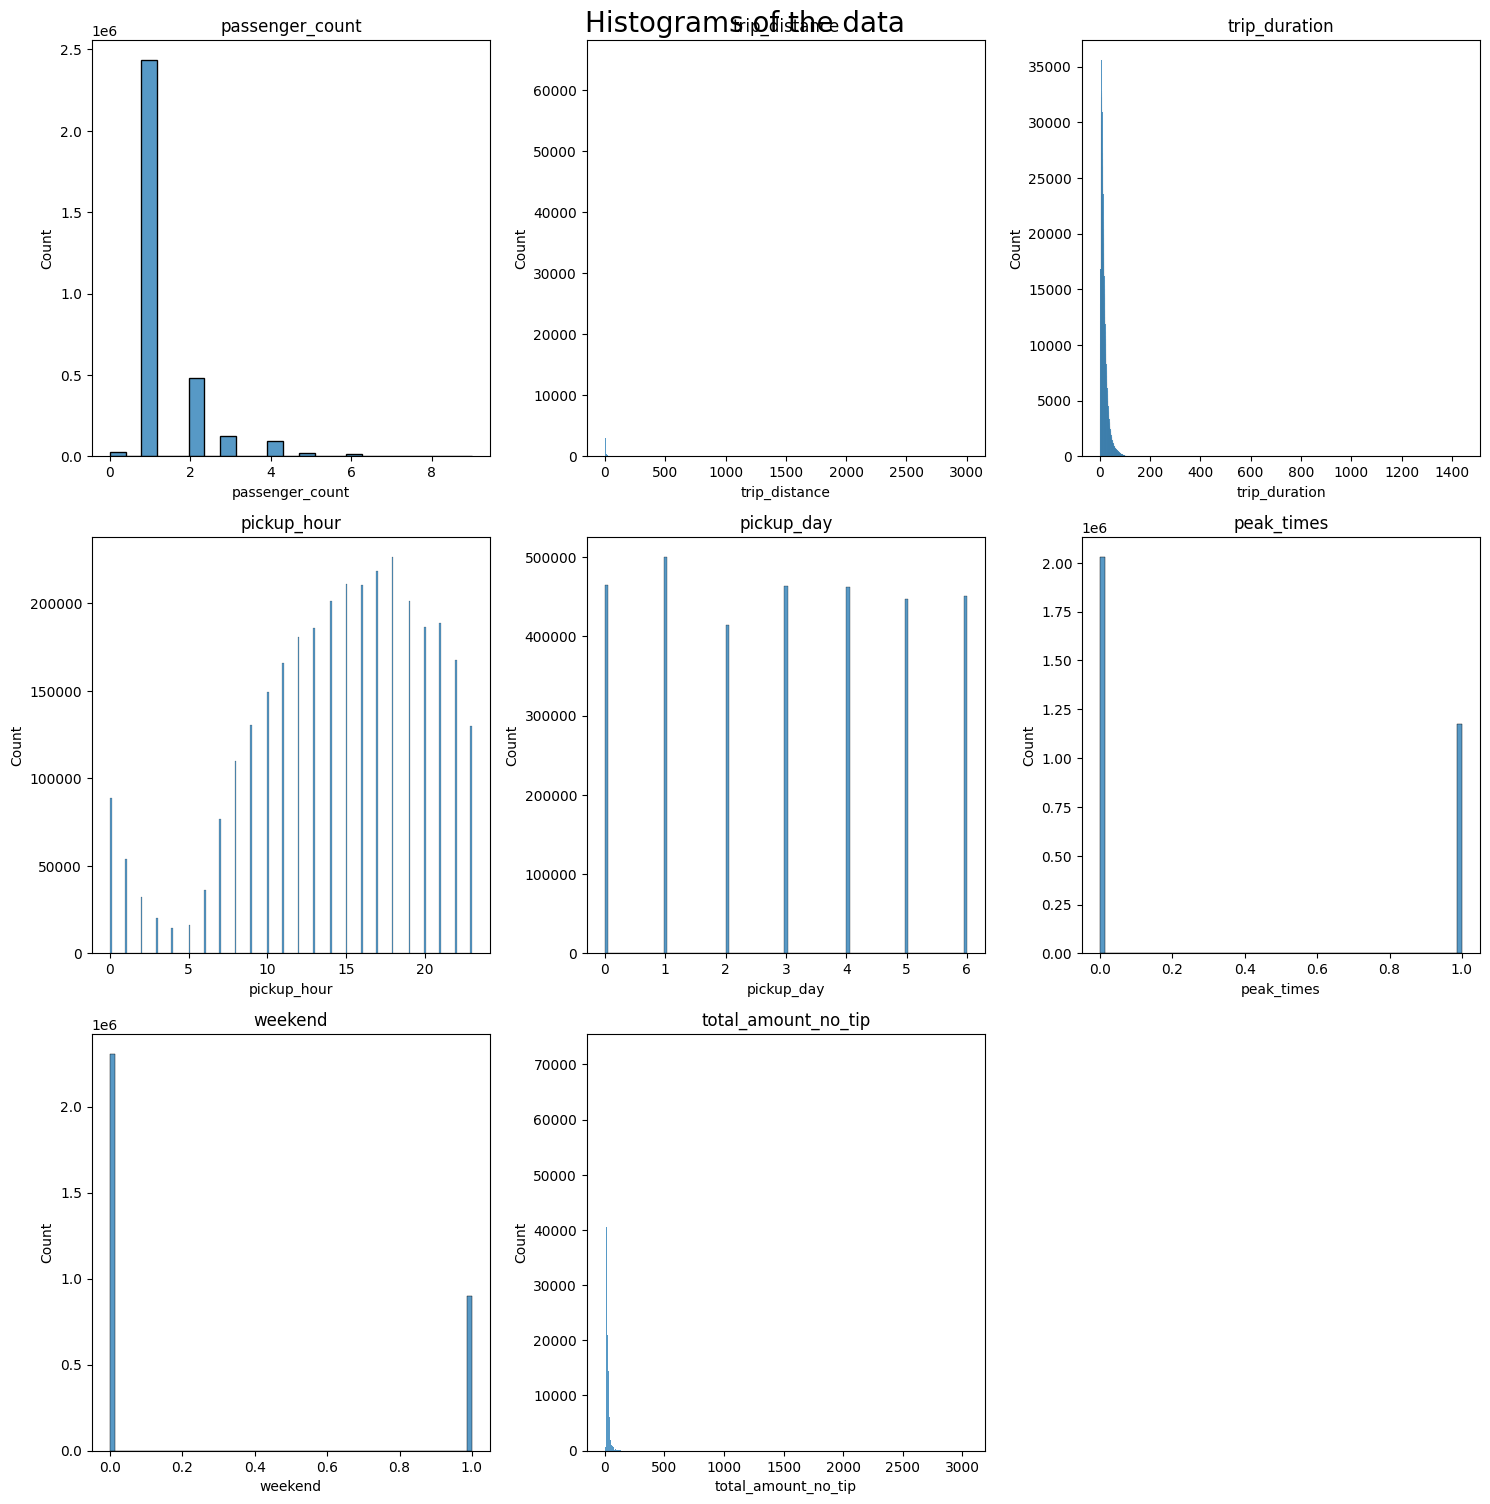

In [36]:
# Now we visualise the data in a number of histograms to get an even better understanding
fig, axes = plt.subplots(5,3, figsize=(15,25))
fig.suptitle('Histograms of the data', fontsize=20)

axes = axes.flatten()

for i,col in enumerate(not_hot_columns):
    sns.histplot(data[col], ax=axes[i], kde=False)
    axes[i].set_title(col)

# Removing the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

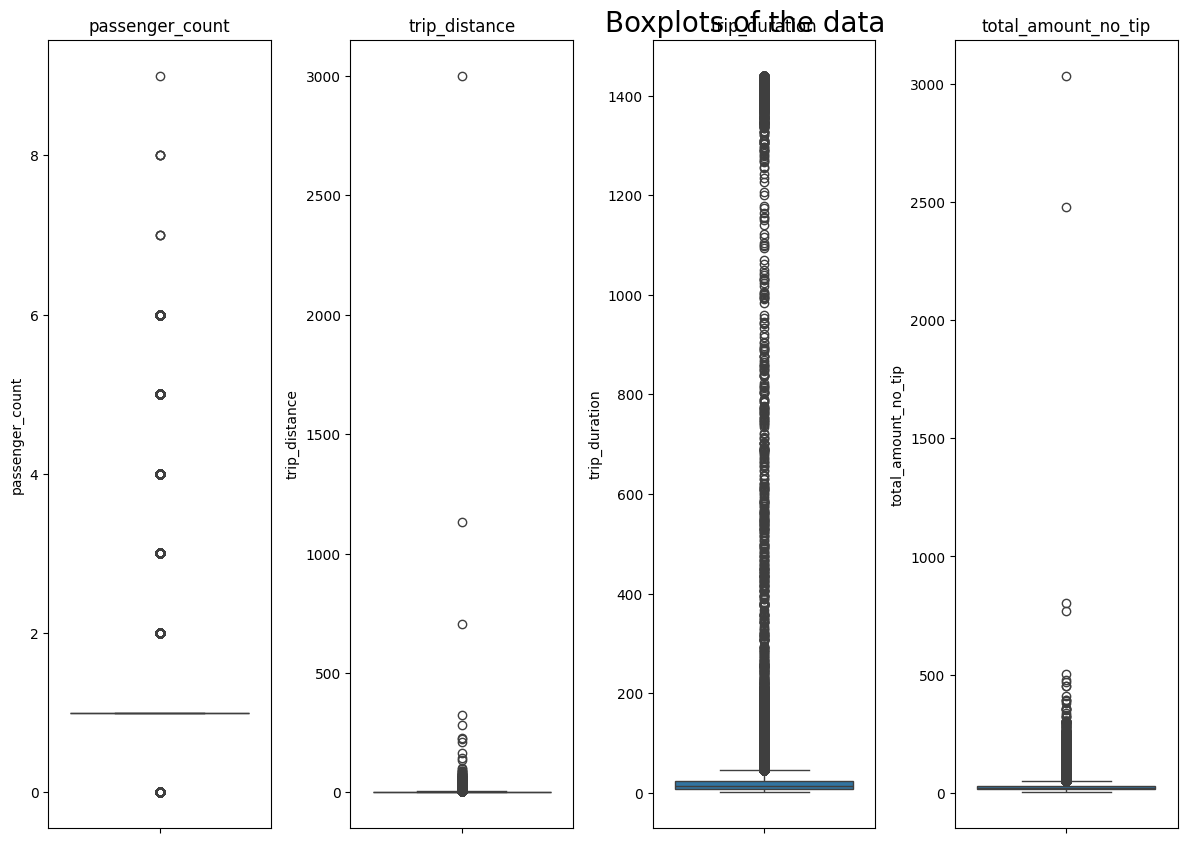

In [38]:
# The histograms already suggest a substantial amount of outliers in the data,
# to get an additional view of the outliers, we'll create boxplots for the same columns
fig, axes = plt.subplots(3,5, figsize=(15,25))
fig.suptitle('Boxplots of the data', fontsize=20)

axes = axes.flatten()

for i,col in enumerate(['passenger_count',
                        'trip_distance',
                        'trip_duration',
                        'total_amount_no_tip']): # Excluding the time related variables as they are 'around the clock' variables thus not susceptible to outliers
    sns.boxplot(data[col], ax=axes[i])
    axes[i].set_title(col)

# Removing the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [50]:
# Given the large amount of outliers in the data multiple variables, we will deal with them using
# the IQR method and since our dataset is very large we will remove outliers without replacing them.
# However, before applying the IQR method, we will remove extreme outliers per variable,
# as they would influene the IQR method too much

# First we quickly drop the obvious weird result from a year before 2010
#data = data[data['tpep_pickup_datetime'].dt.year >= 2010]

# We remove the 3000 miles trip
data = data[data['trip_distance'] < 2500]

# We remove 2500 dollar plus trips as we deem these unrealistic
data = data[data['total_amount_no_tip'] < 2000]

# Since yellow taxis seat 4 passengers max, we remove all trips with more than 4 passengers
data = data[data['passenger_count'] <= 4]


In [51]:
# Creating new list for easier use
numerical_columns = ['passenger_count', 'trip_distance', 'trip_duration', 'total_amount_no_tip']

# Now we remove the other outliers using the IQR method for all numerical columns (note that we're not 
# using the exact quantiles, as 0.1 and 0.9 performed better)
Q1 = data[numerical_columns[1:]].quantile(0.1) # Excluding passenger_count as it is a discrete variable
Q3 = data[numerical_columns[1:]].quantile(0.9) 
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows that are outliers and create a new df without them
outliers = ((data[numerical_columns[1:]] < lower_bound) | (data[numerical_columns[1:]] > upper_bound))
data_no_outliers = data[~outliers.any(axis=1)]


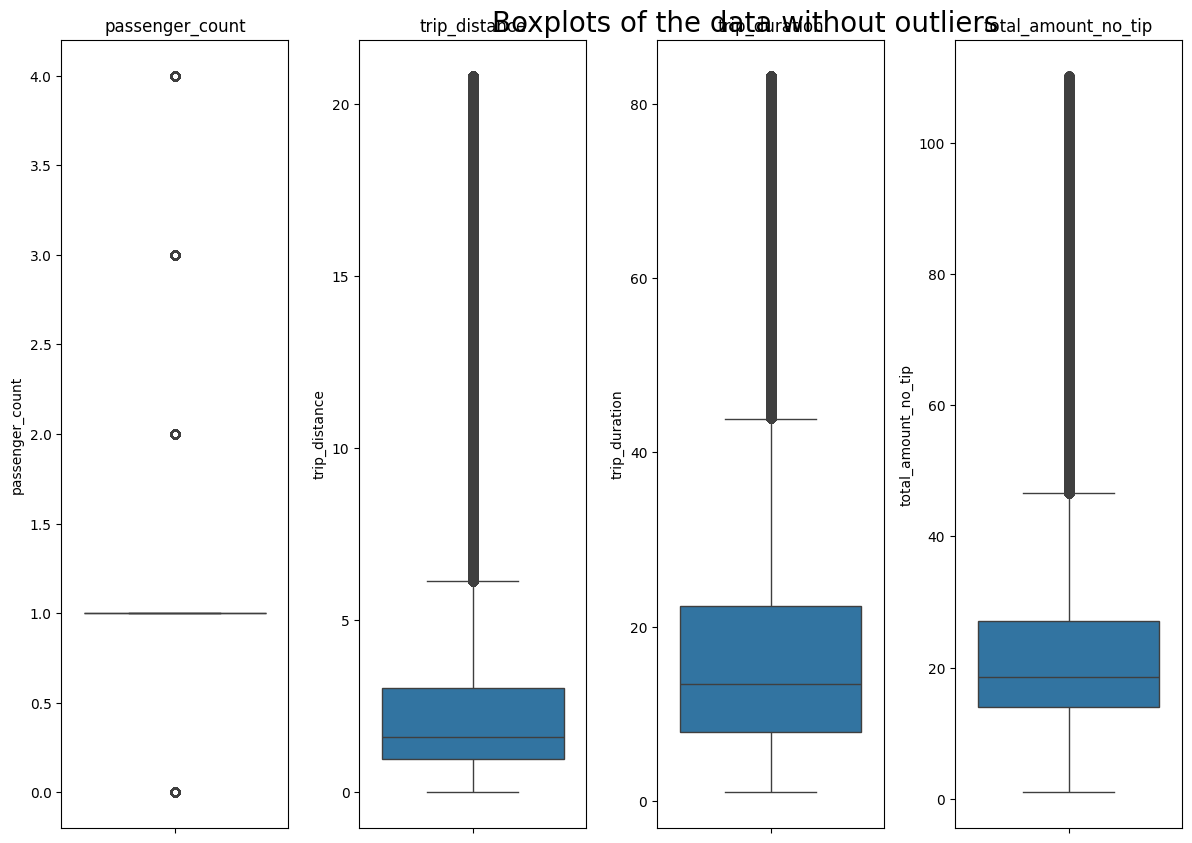

In [52]:
# Now we check the boxplot again
fig, axes = plt.subplots(3,5, figsize=(15,25))
fig.suptitle('Boxplots of the data without outliers', fontsize=20)

axes = axes.flatten()

for i,col in enumerate(numerical_columns): 
    sns.boxplot(data_no_outliers[col], ax=axes[i])
    axes[i].set_title(col)

# Removing the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

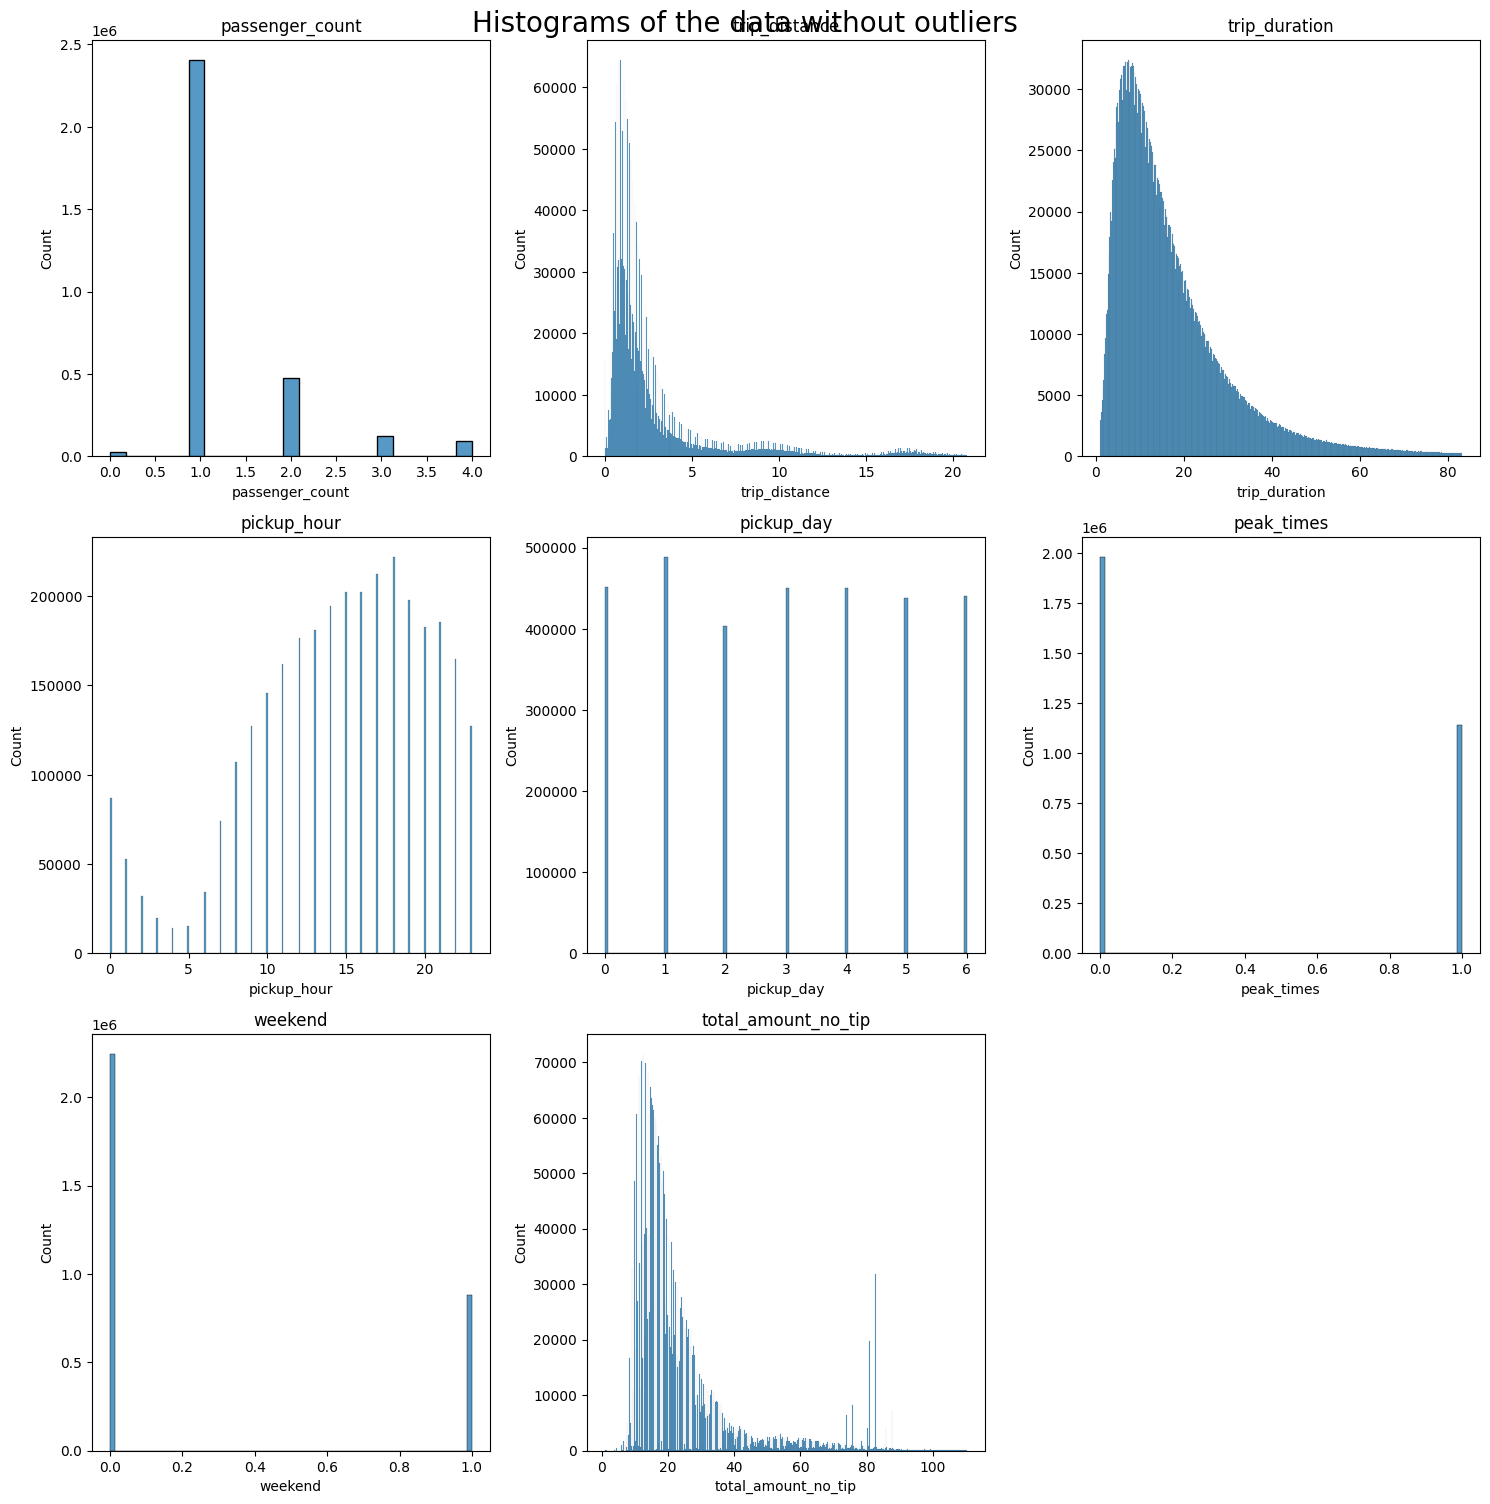

In [53]:
# We can also check the histograms again
fig, axes = plt.subplots(5,3, figsize=(15,25))
fig.suptitle('Histograms of the data without outliers', fontsize=20)

axes = axes.flatten()

for i,col in enumerate(not_hot_columns):
    sns.histplot(data_no_outliers[col], ax=axes[i], kde=False)
    axes[i].set_title(col)

# Removing the empty plots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

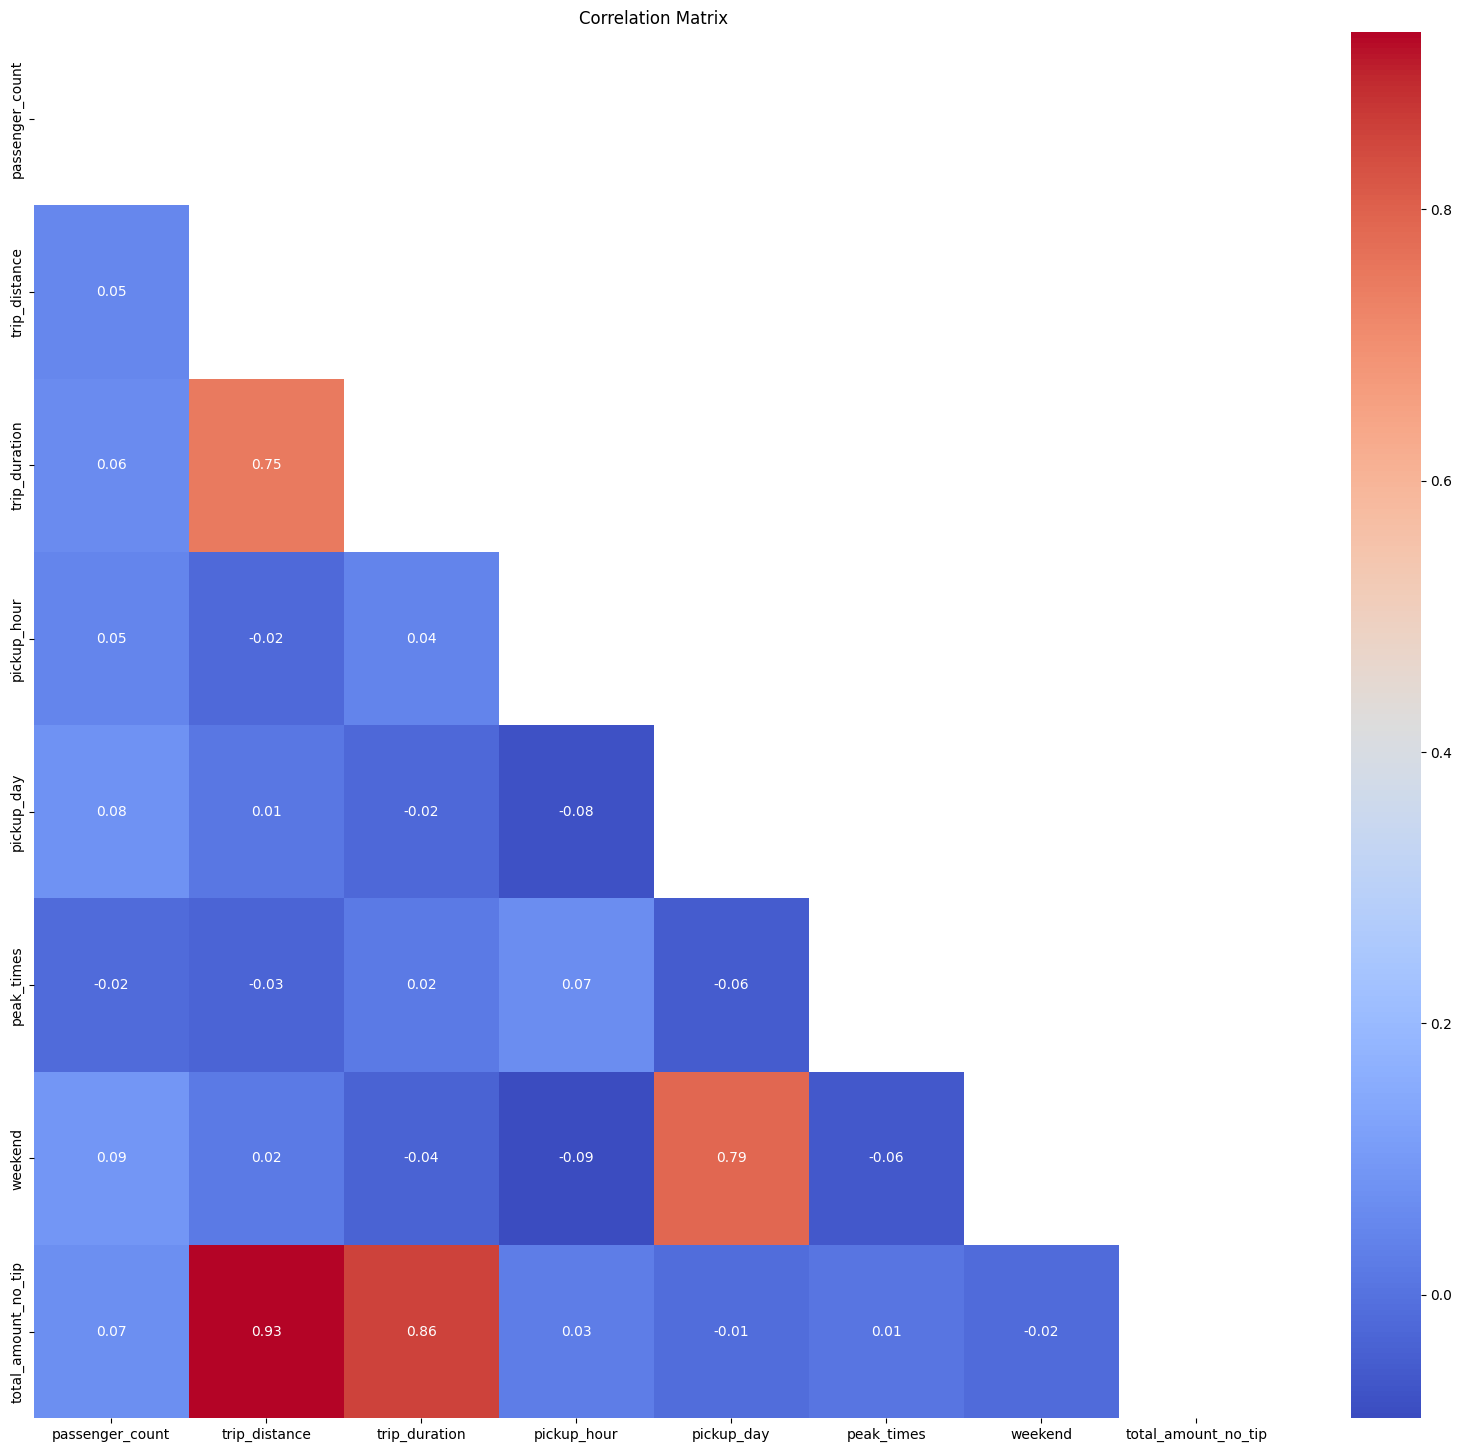

In [55]:
# We now create a correlation matrix to see if there are any strong correlations between the features
correlation_matrix = data_no_outliers[not_hot_columns].corr()

# Creating a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [58]:
# For the algorithms to work properly we will now scale the data (except of course for the hot encoded columns)
scaler = MinMaxScaler()

scaled_data_no_outliers = scaler.fit_transform(data_no_outliers[not_hot_columns])
scaled_data_no_outliers = pd.DataFrame(scaled_data_no_outliers, columns=not_hot_columns)

In [59]:
# Replace the columns in data_no_outliers with the scaled values
data_no_outliers[not_hot_columns] = scaled_data_no_outliers

/var/folders/mz/j0q1_7_x2f59p13bv_c81xhc0000gn/T/ipykernel_63588/3952926173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[not_hot_columns] = scaled_data_no_outliers


In [60]:
# Ff saven want duurde fk lang om alles te runnen en crashte nog wel eens
data_no_outliers.to_parquet('data/final_data_cleaned_scaled.parquet', engine='pyarrow', index=False)

In [62]:
# In case kernel has crashed again, load the data here so you can skip all previous cells
final_data = pd.read_parquet('data/final_data_cleaned_scaled.parquet')
final_data.to_csv()

# Again since kernel sometimes crashes
all_columns = final_data.columns.tolist()
not_hot_columns = ['passenger_count', 'trip_distance', 'trip_duration', 'pickup_hour', 'pickup_day', 'peak_times', 'weekend', 'total_amount_no_tip']

final_data.head()

,passenger_count,trip_distance,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0,payment_type_1,...,Trip_Staten Island->Brooklyn,Trip_Staten Island->Manhattan,Trip_Staten Island->Queens,Trip_Staten Island->Staten Island,trip_duration,pickup_hour,pickup_day,peak_times,weekend,total_amount_no_tip
0,0.25,0.469005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.215937,0.0,1.000000,0.0,1.0,0.423341
1,0.25,0.366170,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.379359,1.0,0.833333,0.0,1.0,0.378032
2,1.00,0.964440,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.403690,0.0,1.000000,0.0,1.0,0.747735
3,0.75,0.112446,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.170316,0.0,1.000000,0.0,1.0,0.179405
4,0.25,0.242672,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.257908,0.0,1.000000,0.0,1.0,0.281922


In [63]:
final_data.columns

Index(['passenger_count', 'trip_distance', 'RatecodeID_1.0', 'RatecodeID_2.0',
       'RatecodeID_3.0', 'RatecodeID_4.0', 'RatecodeID_5.0', 'RatecodeID_6.0',
       'RatecodeID_99.0', 'payment_type_1', 'payment_type_2', 'payment_type_3',
       'payment_type_4', 'Trip_Bronx->Bronx', 'Trip_Bronx->Brooklyn',
       'Trip_Bronx->EWR', 'Trip_Bronx->Manhattan', 'Trip_Bronx->Queens',
       'Trip_Bronx->Staten Island', 'Trip_Brooklyn->Bronx',
       'Trip_Brooklyn->Brooklyn', 'Trip_Brooklyn->EWR',
       'Trip_Brooklyn->Manhattan', 'Trip_Brooklyn->Queens',
       'Trip_Brooklyn->Staten Island', 'Trip_EWR->Brooklyn', 'Trip_EWR->EWR',
       'Trip_EWR->Manhattan', 'Trip_Manhattan->Bronx',
       'Trip_Manhattan->Brooklyn', 'Trip_Manhattan->EWR',
       'Trip_Manhattan->Manhattan', 'Trip_Manhattan->Queens',
       'Trip_Manhattan->Staten Island', 'Trip_Queens->Bronx',
       'Trip_Queens->Brooklyn', 'Trip_Queens->EWR', 'Trip_Queens->Manhattan',
       'Trip_Queens->Queens', 'Trip_Queens->Staten

In [29]:
# Lastly we set create two new dataframes for the features and target variable
y = final_data['fare_amount']
X = final_data.drop(columns=['fare_amount']) 

In [30]:
# Creating train test split
X_train, X_test, y_train, y_test = train_test_split(y, X, test_size=0.2, random_state=42)